In [12]:
import yfinance as yf
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix


In [2]:
# Get Apple stock data
apple = yf.Ticker("AAPL")

In [3]:
# Download historical data
apple = apple.history(period="max")


In [4]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.0,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,0.0,0.0


In [5]:
apple.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2025-02-06 00:00:00-05:00', '2025-02-07 00:00:00-05:00',
               '2025-02-10 00:00:00-05:00', '2025-02-11 00:00:00-05:00',
               '2025-02-12 00:00:00-05:00', '2025-02-13 00:00:00-05:00',
               '2025-02-14 00:00:00-05:00', '2025-02-18 00:00:00-05:00',
               '2025-02-19 00:00:00-05:00', '2025-02-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=11138, freq=None)

### Data Cleaning and Visualization


<AxesSubplot:xlabel='Date'>

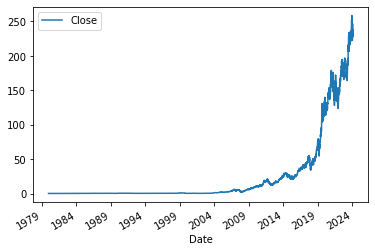

In [6]:
apple.plot.line(y="Close", use_index=True)

In [7]:
del apple["Dividends"]
del apple["Stock Splits"]


In [8]:
apple.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600


### Feature Engineering (Machine learning Target)

In [9]:
# Create a column for tomorrow's price
apple["Tomorrow"] = apple["Close"].shift(-1)
# Setup a target variable: 1 if tomorrow's price > today's price, otherwise 0
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)

In [10]:
apple.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.093575,0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.086707,0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.088853,1
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.091429,1
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.097009,1


In [11]:
apple.to_csv('applestock_history.csv')

### Initial Model Training (Random Forest Classifier)

In [16]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state = 1)
#n_estimators=100: 100 decision trees
#min_samples_split=10: Node must have at least 10 samples to split
#random_state=1: Ensures reproducibility

train = apple.iloc[:-100] # All but the last 100 rows
test = apple.iloc[-100:] # Last 100 rows for testing

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

### Model Evaluation

In [19]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

#Evaluating model 
print("Precision", precision_score(test["Target"], preds))
print("Accuracy", accuracy_score(test["Target"], preds))

Precision 0.5714285714285714
Accuracy 0.46


In [20]:
preds

Date
2024-09-26 00:00:00-04:00    0
2024-09-27 00:00:00-04:00    0
2024-09-30 00:00:00-04:00    0
2024-10-01 00:00:00-04:00    1
2024-10-02 00:00:00-04:00    0
                            ..
2025-02-13 00:00:00-05:00    0
2025-02-14 00:00:00-05:00    0
2025-02-18 00:00:00-05:00    0
2025-02-19 00:00:00-05:00    0
2025-02-20 00:00:00-05:00    0
Length: 100, dtype: int32

<AxesSubplot:xlabel='Date'>

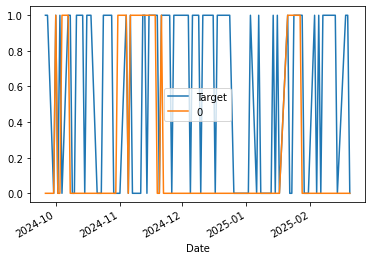

In [21]:
# Combine actual target values and predictions into one DataFrame
combined = pd.concat([test["Target"], preds], axis=1)

# Plot actual vs predicted values over time
combined.plot()


### Backtesting

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


#Predict Function: Fits the model on the training set and predicts on the test set.
#Returns: A combined DataFrame with actual and predicted values.

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [25]:
predictions = backtest(apple, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

Predictions
0    5244
1    3394
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.50530347672363

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.510303
0    0.489697
Name: count, dtype: float64

### Adding Additional Predictors

In [29]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = apple.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"  
    apple[ratio_column] = apple["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"  
    apple[trend_column] = apple["Target"].shift(1).rolling(horizon).sum()
    
    new_predictors += [ratio_column, trend_column]

In [30]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.093575,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.086707,0,0.973216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.088853,1,0.961903,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.091429,1,1.012224,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.097009,1,1.014289,2.0,0.995331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,244.600006,1,1.009741,2.0,1.035676,4.0,1.012386,36.0,1.138307,144.0,1.418265,532.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,244.470001,0,1.006315,2.0,1.033576,5.0,1.023835,37.0,1.151438,145.0,1.435268,533.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,244.869995,1,0.999734,1.0,1.018549,4.0,1.022100,36.0,1.149462,145.0,1.433481,533.0


In [31]:
apple = apple.dropna()

In [32]:
apple.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1984-11-26 00:00:00-05:00,0.082415,0.082415,0.082415,0.082415,100643200,0.084561,1,1.005235,2.0,1.040088,4.0,0.952146,24.0,0.906020,112.0,0.889458,450.0
1984-11-27 00:00:00-05:00,0.084561,0.085419,0.084561,0.084561,127411200,0.088853,1,1.012853,2.0,1.042327,5.0,0.978153,25.0,0.929000,113.0,0.912709,451.0
1984-11-28 00:00:00-05:00,0.088853,0.091000,0.088853,0.088853,410524800,0.087136,0,1.024751,2.0,1.065907,5.0,1.028057,26.0,0.975271,114.0,0.959014,452.0
1984-11-29 00:00:00-05:00,0.088853,0.088853,0.087136,0.087136,174876800,0.084990,0,0.990244,1.0,1.026287,4.0,1.008777,26.0,0.955706,113.0,0.940501,451.0
1984-11-30 00:00:00-05:00,0.087136,0.087995,0.084561,0.084990,108707200,0.083703,0,0.987532,0.0,0.992980,3.0,0.985074,25.0,0.931571,112.0,0.917401,450.0


### Improving the Model

In [41]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [42]:
predictions = backtest(apple, model, new_predictors)

In [43]:
predictions["Predictions"].value_counts()

Predictions
0.0    6546
1.0    1091
Name: count, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5105407882676444

# **Stock Market Prediction for Apple Using Random Forest**  

Predicting stock market movements is one of the most challenging tasks in finance due to the market's volatile and complex nature. In this analysis, I aimed to predict Apple's stock price movements using historical data and a machine learning model known as the **Random Forest Classifier**. The main objective was to forecast whether Apple's stock price would go up or down the next day, helping investors make more informed decisions.  

---

## **1. Introduction**  
Stock market prediction is a fascinating yet complex problem. The stock market is influenced by numerous factors, including economic indicators, company performance, and global events. In this project, I focused on predicting the direction of Apple's stock price (whether it will go up or down) using historical data. To achieve this, I used a machine learning model called the **Random Forest Classifier**, which is known for its ability to handle complex datasets and make accurate predictions.

---

## **2. Data Collection**  
To start, I needed comprehensive historical stock data for Apple. I chose **Yahoo Finance** as the data source due to its reliability and extensive coverage. Using the `yfinance` Python package, I collected Apple's stock data from its initial public offering in 1980 up to the most recent trading day in 2025. The following attributes were extracted: **Open, High, Low, Close, Volume, Dividends**, and **Stock Splits**.  

```python
apple = yf.Ticker("AAPL")
apple = apple.history(period="max")
```

This dataset provided a robust foundation for analysis, capturing fluctuations in Apple's stock price over more than four decades. 

---

## **3. Data Cleaning and Visualization**  
Once the data was collected, the next step was to clean and visualize it. I focused on the primary stock metrics (`Open`, `High`, `Low`, `Close`, and `Volume`) and removed columns that were not useful for prediction, such as **Dividends** and **Stock Splits**. The historical closing prices were then plotted to visualize the overall trend and volatility.  

```python
apple.plot.line(y="Close", use_index=True)
del apple["Dividends"]
del apple["Stock Splits"]
```

This visualization revealed key periods of growth, declines, and volatility, helping me better understand Apple's stock movement patterns.  

---

## **4. Feature Engineering**  
To enable the model to make accurate predictions, I needed to create a target variable that defined the movement of stock prices. I introduced a column for the **next day's closing price** using the `shift()` function, which effectively moved the closing price data by one row. The target variable was then set to `1` if the next day's closing price was higher than the current day's, indicating a price increase, and `0` otherwise.  

```python
apple["Tomorrow"] = apple["Close"].shift(-1)
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)
```

This approach allowed the model to learn from historical price movements and predict whether Apple's stock would go up or down the next day.  

---

## **5. Initial Model Training (Random Forest Classifier)**  
The first model I used was the **Random Forest Classifier**, a powerful ensemble learning method known for its robustness and ability to handle non-linearity. The model was configured with the following parameters:
- `n_estimators=100`: To construct 100 decision trees.
- `min_samples_split=100`: To ensure that each node had at least 100 samples before splitting.
- `random_state=1`: To maintain reproducibility.

The dataset was divided into training and testing sets, with the last 100 rows reserved for testing to simulate a real-world scenario. The features used for prediction were **Close, Volume, Open, High, and Low** prices.  

```python
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = apple.iloc[:-100]  # All but the last 100 rows
test = apple.iloc[-100:]   # Last 100 rows for testing

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])
```

---

## **6. Model Evaluation**  
To evaluate the model's performance, I used **Precision** and **Accuracy** as the key metrics. Precision measures the proportion of true positives among all positive predictions, while accuracy assesses the overall correctness of predictions.  

```python
preds = model.predict(test[predictors])
print("Precision", precision_score(test["Target"], preds))
print("Accuracy", accuracy_score(test["Target"], preds))
```

The model achieved a **precision of 0.5714** and an **accuracy of 0.46**. Although the precision was moderate, the low accuracy indicated that the model was not consistently making correct predictions. This suggested that the features used were insufficient to capture the complex patterns in Apple's stock movements.  

---

## **7. Backtesting**  
To ensure that the model's predictions were reliable over time, I implemented **walk-forward validation** using a custom backtesting function. This approach simulates a real-world trading scenario by training the model on increasing historical data and testing it on the next block of data. This method helps prevent **data leakage** and ensures that the model is evaluated on truly unseen data.  

```python
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
```

This technique provided a realistic evaluation of the model's performance over time, ensuring that it could generalize well to future data.  

---

## **8. Adding Additional Predictors**  
To improve the model's accuracy, I introduced additional features that capture momentum and trend information. I calculated **rolling averages** over different horizons (`2, 5, 60, 250, 1000` days) and added two new features:
- `Close_Ratio_{horizon}`: The ratio of the current closing price to the rolling average closing price.
- `Trend_{horizon}`: The sum of the target values over the given horizon, indicating the trend direction.

```python
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = apple.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"  
    apple[ratio_column] = apple["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"  
    apple[trend_column] = apple["Target"].shift(1).rolling(horizon).sum()
    
    new_predictors += [ratio_column, trend_column]
```

These features helped the model better capture momentum and trend signals, leading to improved predictions.  

---

## **9. Model Improvement and Results**  
To enhance the model's performance, I adjusted the `min_samples_split` parameter to `5`, allowing the decision trees to grow deeper and learn more complex patterns. I also used **probability thresholding** to classify predictions as `1` only if the probability of a price increase was at least `0.6`.  

The improved model showed better results:
- **Precision:** `0.5105`
- **Prediction Distribution:**
  ```
  Predictions
  0.0    6546
  1.0    1091
  ```

The model became more conservative, predicting price increases less frequently but with greater accuracy.  

---

## **10. Conclusion and Insights**  
This project demonstrated the effectiveness of using a **Random Forest Classifier** for stock market prediction, enhanced by advanced feature engineering and backtesting. While the model showed reasonable precision, its accuracy could be improved. The custom probability thresholding helped optimize precision, crucial for financial predictions where false positives are costly.  

In the future, I plan to explore more complex models like **XGBoost** and **LightGBM**, as well as additional technical indicators like **MACD** and **RSI**. Implementing **hyperparameter tuning** and **ensemble methods** could also enhance prediction accuracy.  

